In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression


In [2]:
# Importing the dataset
df = pd.read_csv("datasets_13720_18513_insurance.csv")

In [3]:
# Reading the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# See other information of the dataset
df.info


<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
# The dataset have 1338 rows and 7 columns
df.shape

(1338, 7)

In [6]:
# See if any data is missing. (Chekc for NULL values)
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
# Counting the missing values. (See which fields are missing).
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# There are no NULL values in this dataset.

In [9]:
# From the information above we can see that no value is missing.

In [10]:
# In this step, the dataset was analysed to check the relationship between the various columns. 
# The dataset was grouped by age, and then the relationship between age and charges was analysed.

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:

# Which are the Numeric and CAtegorical columns?

In [13]:
all_columns         = list(df)
numeric_columns     = ['age', 'bmi', 'children', 'charges']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'charges']

Categorical columns
['sex', 'smoker', 'region']


In [14]:
df.isnull().apply(lambda x : [ sum(x), (sum(x) * 100) / df.shape[0]] )

,age,sex,bmi,children,smoker,region,charges
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
from scipy.stats import kurtosis, skew, stats

In [17]:
print("Summary Statistics of Medical Costs")
print(df['charges'].describe())
print("skew:  {}".format(skew(df['charges'])))
print("kurtosis:  {}".format(kurtosis(df['charges'])))
print("missing charges values: {}".format(df['charges'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
skew:  1.5141797118745743
kurtosis:  1.595821363956751
missing charges values: 0
missing smoker values: 0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


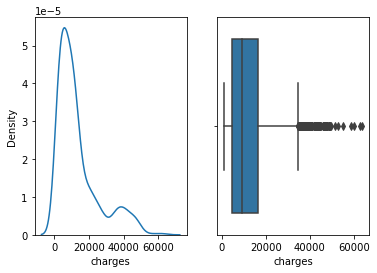

In [18]:
# Below you can see that there are some outliers.

f, axes = plt.subplots(1, 2)
sns.kdeplot(df['charges'], ax=axes[0])
sns.boxplot(df['charges'], ax=axes[1])
plt.show()

In [19]:
insur_corr=df.corr()
insur_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


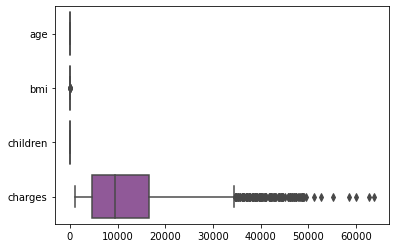

In [20]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [21]:
# Remove duplicates

In [22]:
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

In [24]:
#PLOT THE INSURANCE PREMIUM DATASET

<AxesSubplot:ylabel='Frequency'>

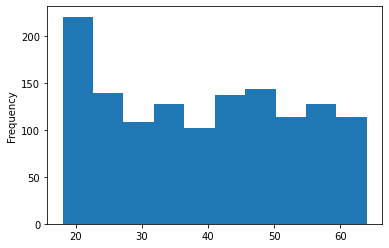

In [25]:
df.age.plot(kind="hist")

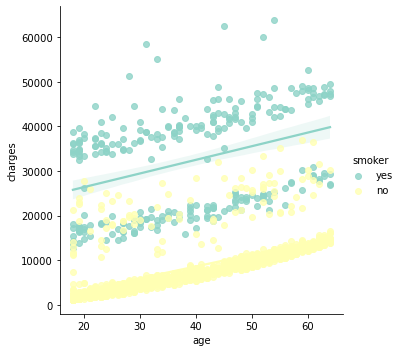

In [26]:
sns.lmplot( x='age',y='charges', data=df, hue='smoker', palette='Set3', scatter={"s": 10})
plt.show()

In [27]:
df.smoker.count()

1337

Text(0, 0.5, 'count')

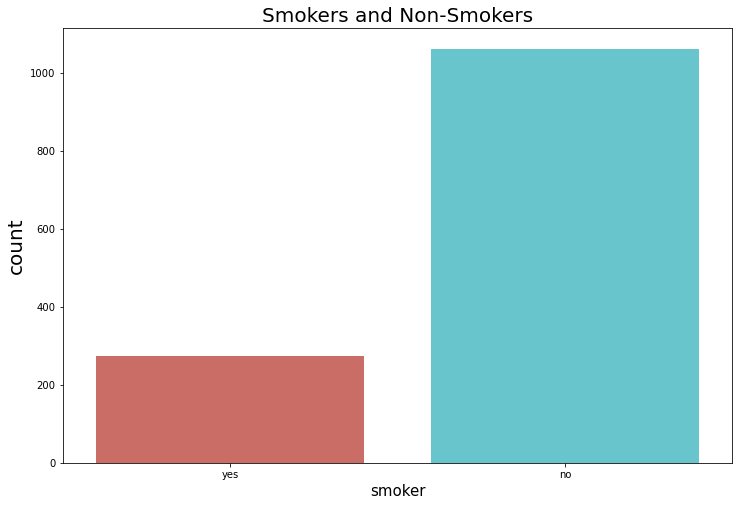

In [28]:
# Below you can see the difference between smokers and none smokers.
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=df,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

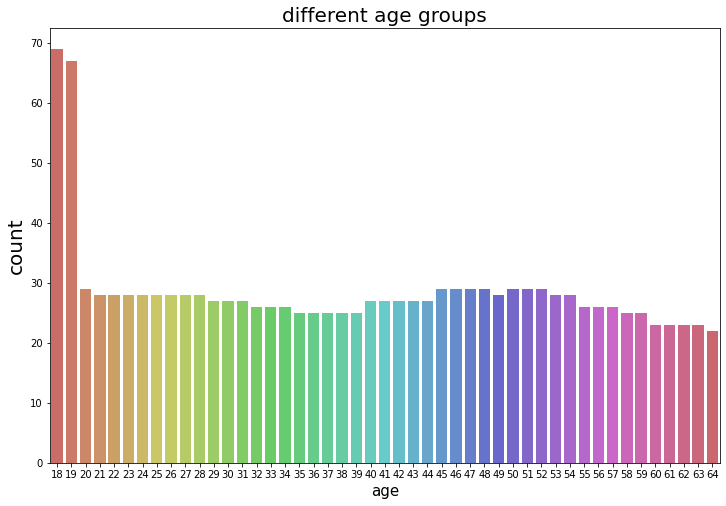

In [29]:
# Different ages of smokers
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=df,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

# At age 18 and 19 there are the most smokers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

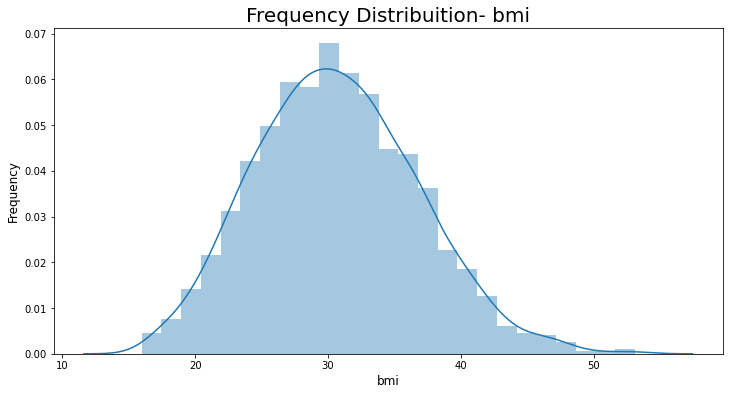

In [30]:
plt.figure(figsize=(12,6))
g = sns.distplot(df["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

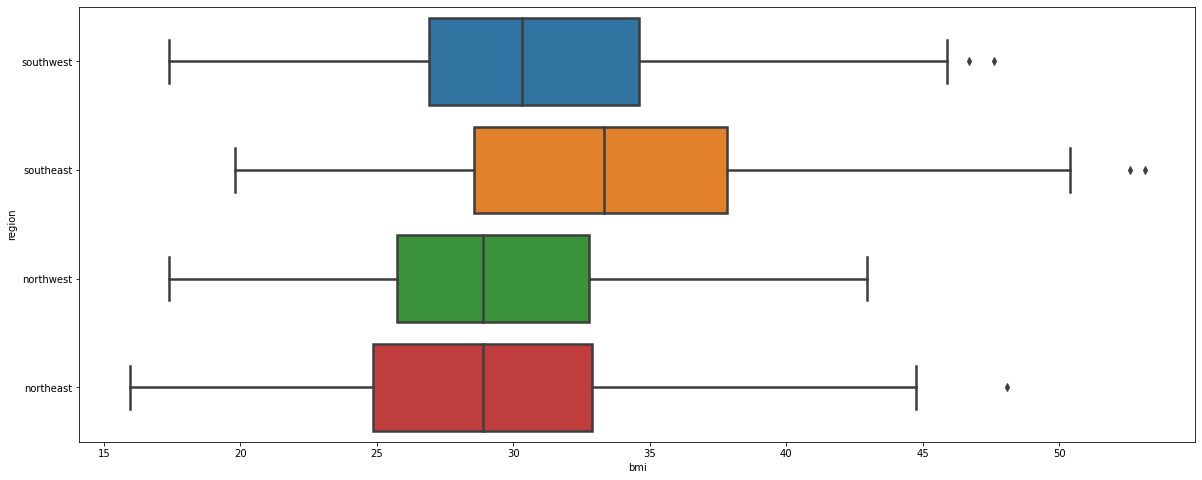

In [31]:
# See below the BMI of every region
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=df, linewidth=2.5)
plt.show()

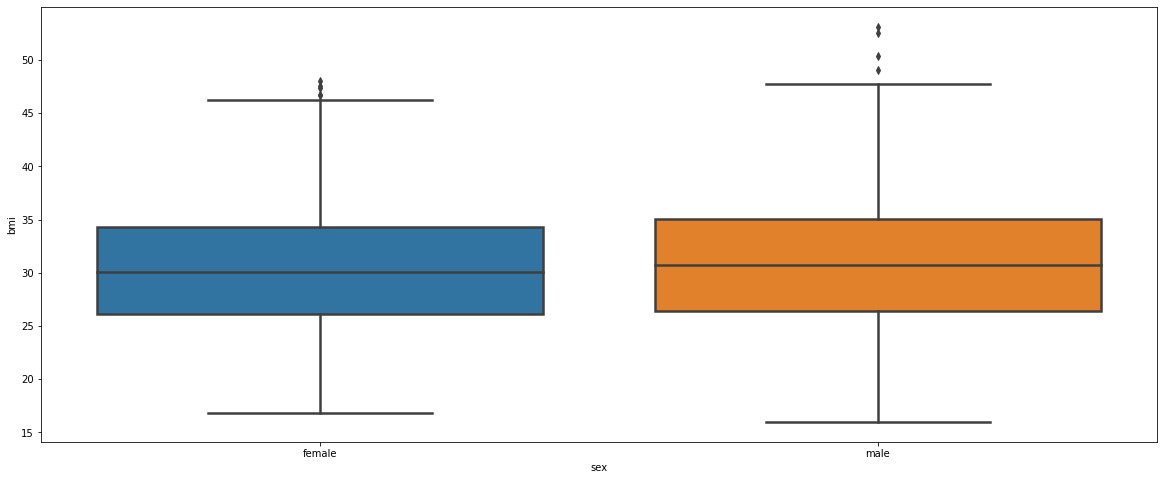

In [32]:
# See below the correlation between Sex and Bmi.
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="sex" ,y="bmi", data=df, linewidth=2.5)
plt.show()

# Data visualisation
# Dataset is cleaned. So that the model could be trained and visualized.

<AxesSubplot:ylabel='Frequency'>

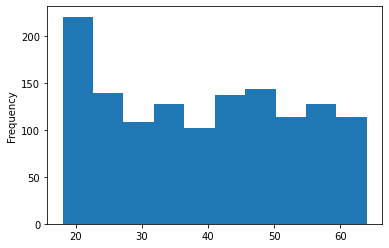

In [33]:
# Ages
df.age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

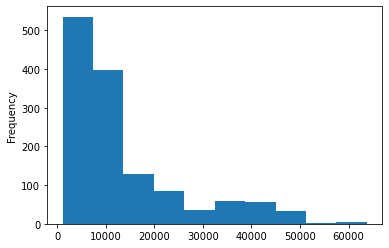

In [34]:
#Charges(Expensives)
df.charges.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

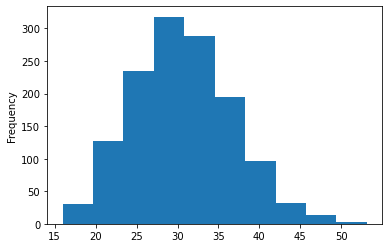

In [35]:
#BMI
df.bmi.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

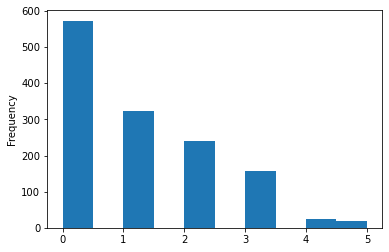

In [36]:
# Children
df.children.plot(kind="hist")

<AxesSubplot:ylabel='region'>

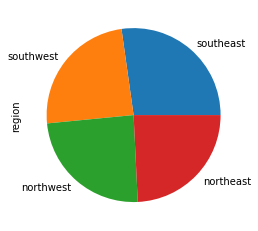

In [37]:
# Pie plot region
df.region.value_counts().plot(kind="pie")
# See below overview of smokers in all region

<AxesSubplot:ylabel='smoker'>

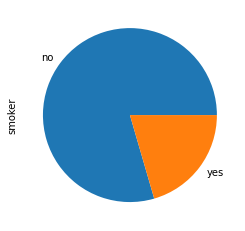

In [38]:
#Pie plot of smoker and none smoker
df.smoker.value_counts().plot(kind="pie")

# See below difference between smokers and non smokers 

In [39]:
# Mean Expenses for Smokers is more than Non Smokers

In [40]:
df.groupby("smoker").charges.agg(["mean","median","count"])

,mean,median,count
smoker,,,
no,8440.660307,7345.72660,1063
yes,32050.231832,34456.34845,274


In [41]:
#Expenses for male and female
df.groupby("sex").charges.agg(["mean","median","count"])

,mean,median,count
sex,,,
female,12569.578844,9412.9625,662
male,13974.998864,9377.9047,675


In [42]:
#Mean of Smokers and Non Smokers
df.groupby("smoker").age.mean()

smoker
no     39.404516
yes    38.514599
Name: age, dtype: float64

# The correlation matrix was plotted to see the positive and negative relationships among the multiple factors. Here we can conclude that charges are positively related to smoking and age.

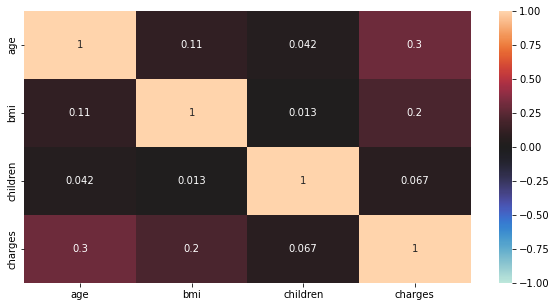

In [43]:
# Correlation matrix with a heat map.
plt.figure(figsize=(10,5))

corr = df.corr()
ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

In [44]:
#Above correlation and covariance value inform that there exist strong relationship between expenses. AGE (0.3) and BMI(0.2) for numerical variables

# Below the pairplot diagram was plotted. 
# Pairplot diagrams are used to figure out which attributes best explain the connection between two variables or form the most separated groups.
# Drawing basic lines or making a linear distinction in our dataset also aided in the formation of some simple categorisation models.

# We can see that as bmi increased, charges tended to increase as well. Therefore, there is a linear relationship between the charges and age.



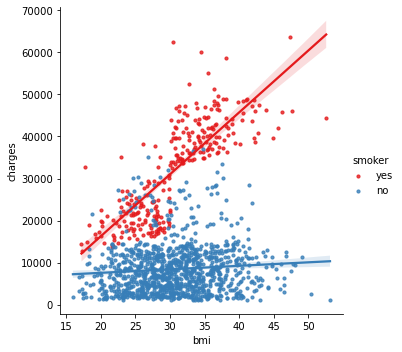

In [45]:
sns.lmplot( x='bmi',y='charges', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

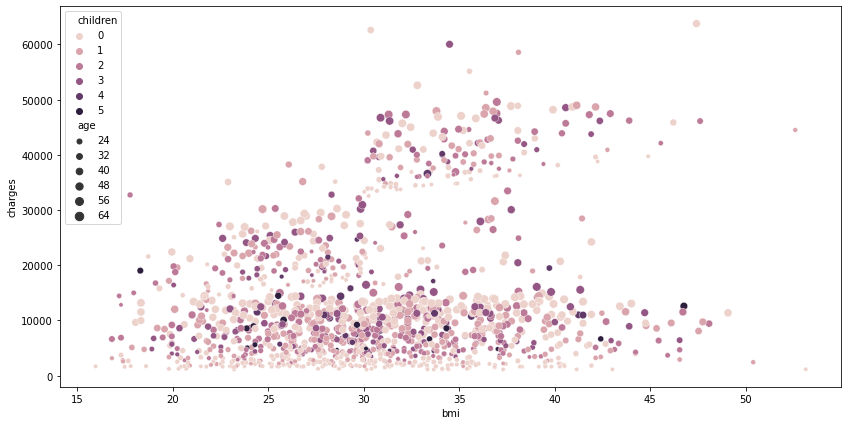

In [46]:
#Scatter plot: BMI, Charges, Children and Ages
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['children'],size=df['age'])

#  After plotting the pairplot diagram, the regplot was plotted. We can see that as age increased, charges tended to increase as well. 

<AxesSubplot:xlabel='age', ylabel='charges'>

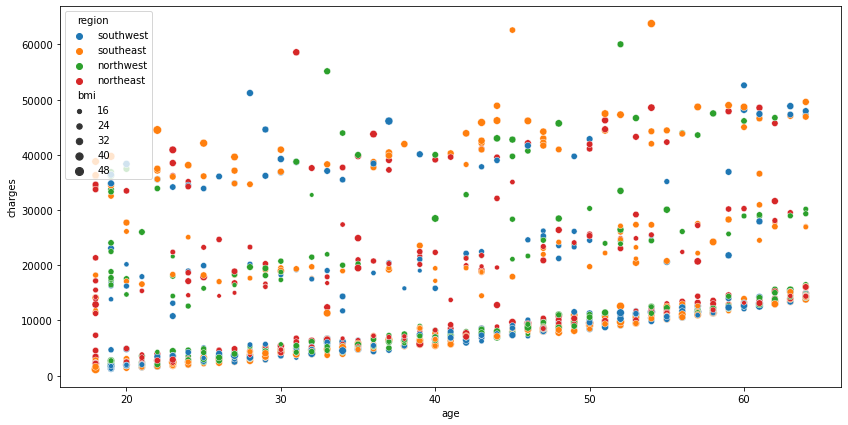

In [47]:
# Charges related with Ages
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['charges'],hue=df['region'],size=df['bmi'])

# Below we can see the charges in relation with the BMI of the regions

<AxesSubplot:xlabel='bmi', ylabel='charges'>

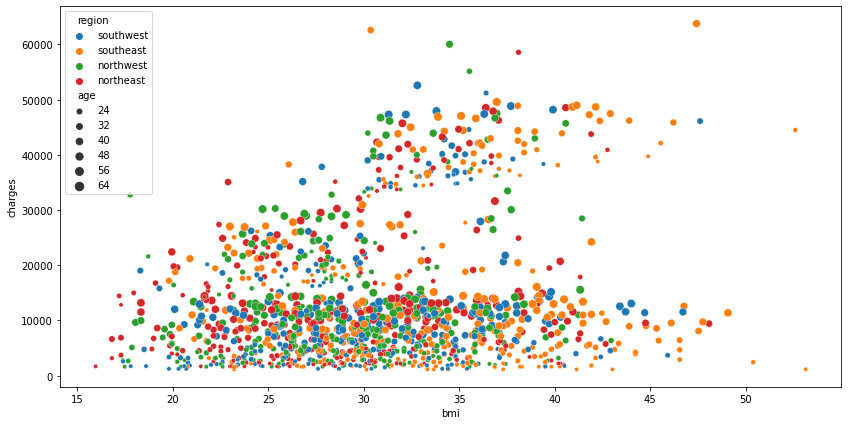

In [48]:
#Charges related with BMI
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['region'],size=df['age'])

<AxesSubplot:xlabel='age', ylabel='charges'>

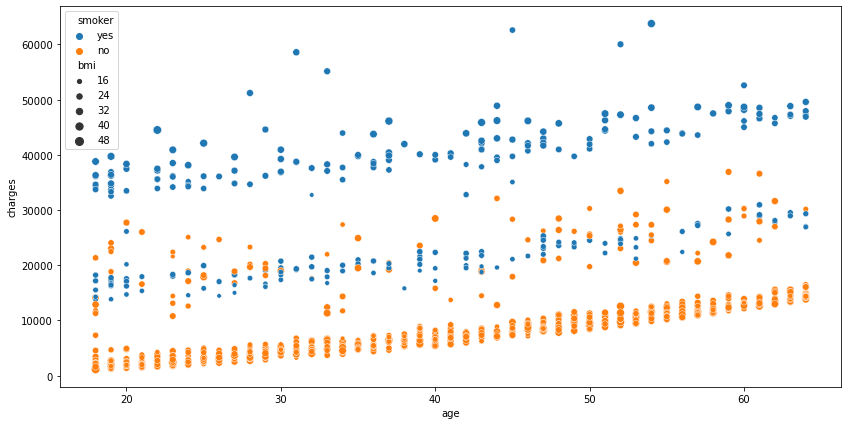

In [49]:
#Charges related with Ages, Smoker and BMI
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['age'], y=df['charges'],hue=df['smoker'],size=df['bmi'])

# Below we can see that the charges are getting high of smokers netween the age 30 till 45.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

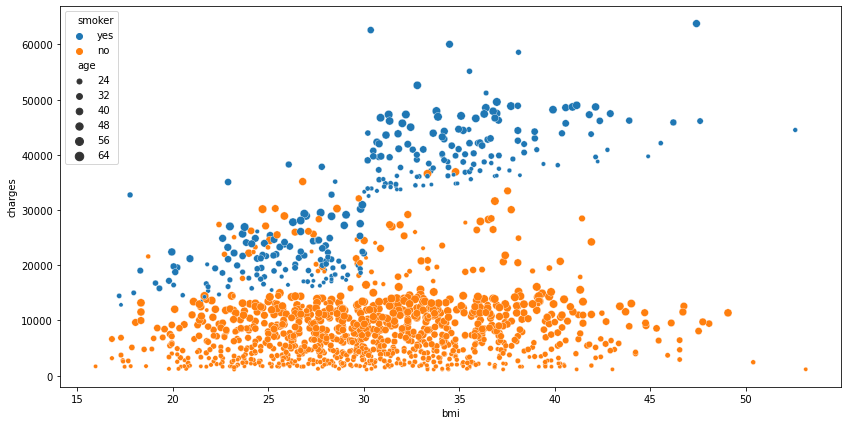

In [50]:
# Relation between BMI, Charges, Smoker and Ages
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['smoker'],size=df['age'])

<AxesSubplot:xlabel='bmi', ylabel='charges'>

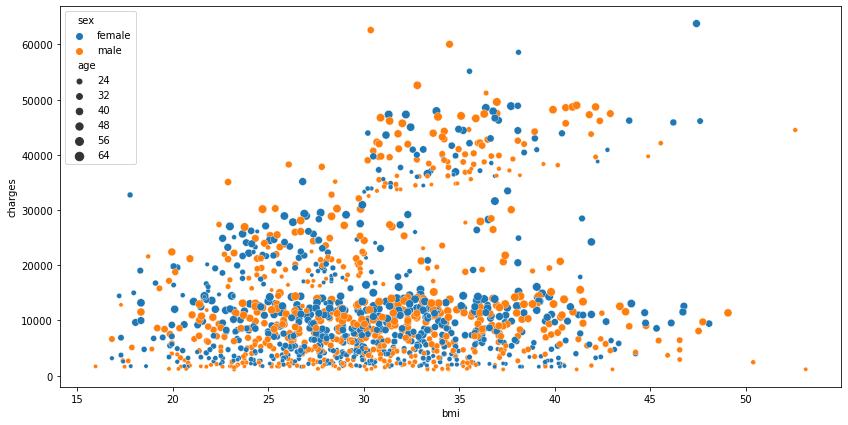

In [51]:
#Relation between Bmi, Charges, Sex and Age
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['bmi'], y=df['charges'],hue=df['sex'],size=df['age'])

# Below we can see the relation between Male/Female and age, bmi, children and charges.

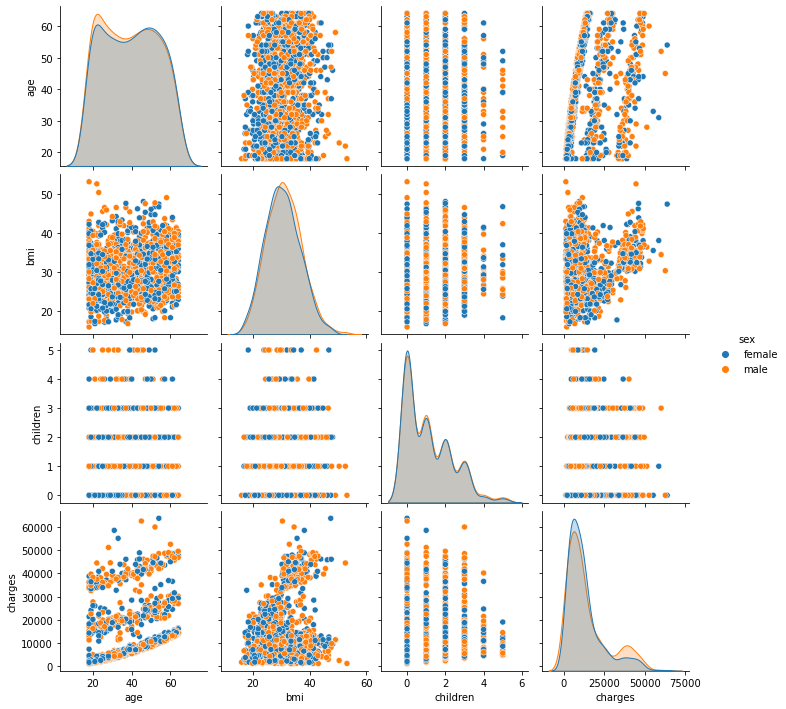

In [52]:
#Pairplot Sex
sns.pairplot(data=df,hue='sex')

# Below we can see the relation between age, bmi, children and charges of Smokers.

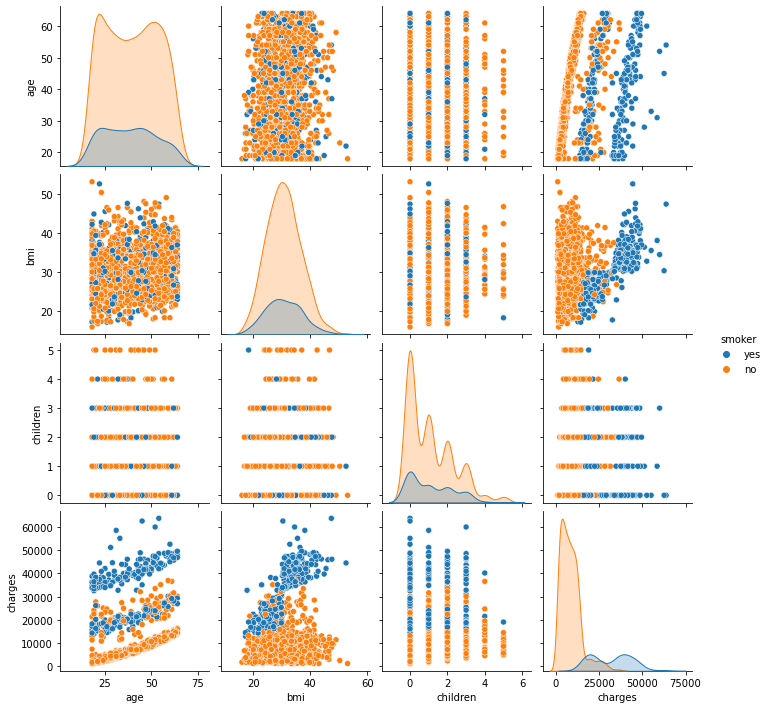

In [53]:
#Pairplot Smoker
sns.pairplot(data=df,hue='smoker')

# Below we can see the relation between  age, bmi, children and charges in all Region

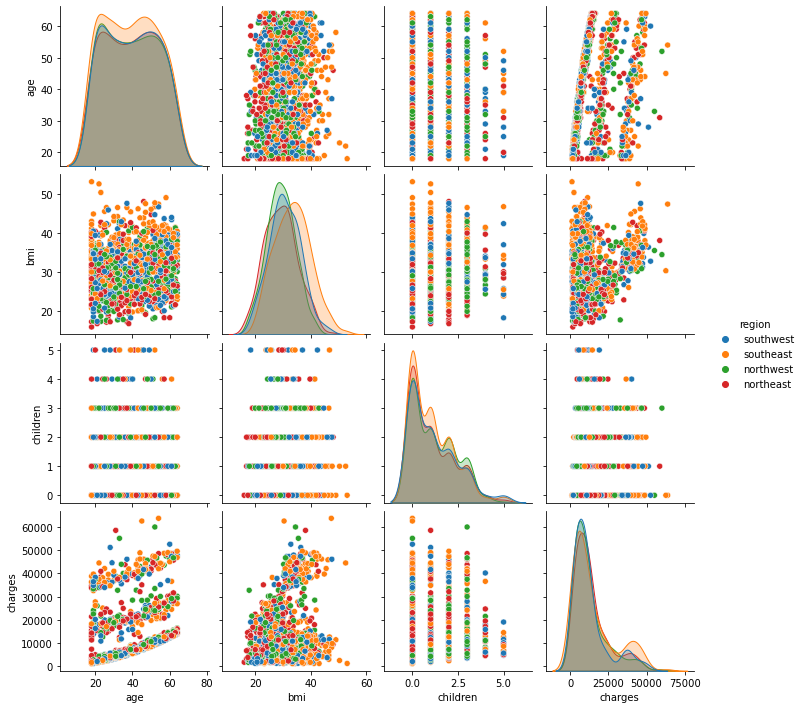

In [54]:
#Pairplot Region
sns.pairplot(data=df,hue='region')

# # Below we can see the relation between Children and age, bmi,  and charges.

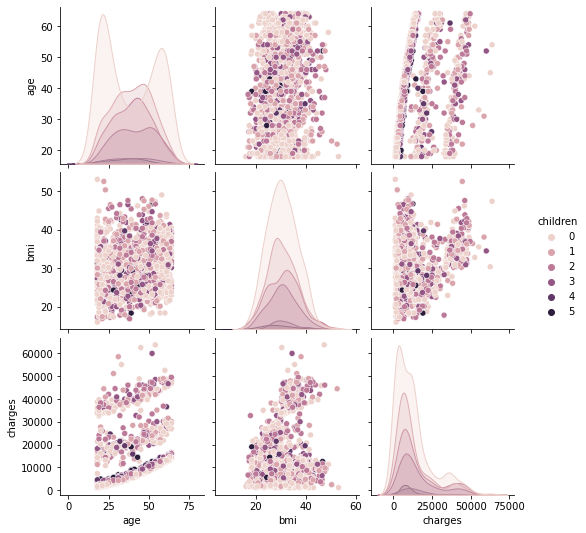

In [55]:
sns.pairplot(data=df,hue='children')

<AxesSubplot:xlabel='sex', ylabel='charges'>

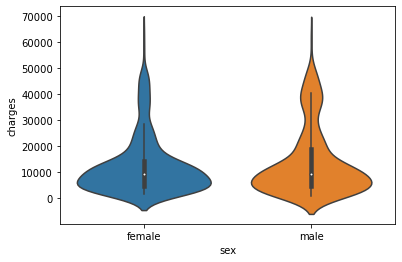

In [56]:
#Violin plot Sex and charges
sns.violinplot(x='sex', y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

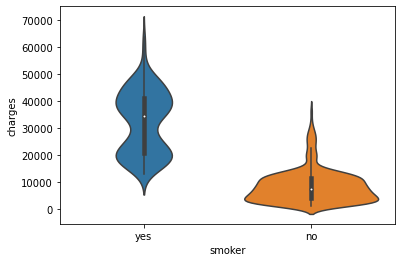

In [57]:
#Violin plot Smoker and Charges
sns.violinplot(x='smoker', y='charges',data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

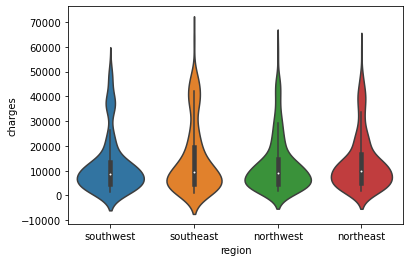

In [58]:
# Violinplot Region and Chrages
sns.violinplot(x='region', y='charges',data=df)

In [59]:
# Importing necessary package for creating model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [60]:
cat_col=['smoker','region','sex']
num_col=[i for i in df.columns if i not in cat_col]
num_col

['age', 'bmi', 'children', 'charges']

In [61]:
# one-hot encoding
one_hot=pd.get_dummies(df[cat_col])
insur_procsd_df=pd.concat([df[num_col],one_hot],axis=1)
insur_procsd_df.head(10)

,age,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,16884.92400,0,1,0,0,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,1
5,31,25.740,0,3756.62160,1,0,0,0,1,0,1,0
6,46,33.440,1,8240.58960,1,0,0,0,1,0,1,0
7,37,27.740,3,7281.50560,1,0,0,1,0,0,1,0
8,37,29.830,2,6406.41070,1,0,1,0,0,0,0,1
9,60,25.840,0,28923.13692,1,0,0,1,0,0,1,0


In [62]:
#label encoding
insr_procsd_df_label=df
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])
insr_procsd_df_label.head(10)

C:\Users\customer\AppData\Local\Temp/ipykernel_3164/546818483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insr_procsd_df_label[i] = label_encoder.fit_transform(insr_procsd_df_label[i])


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
#using one hot encoding
X=insur_procsd_df.drop(columns='charges')
y=df[['charges']]

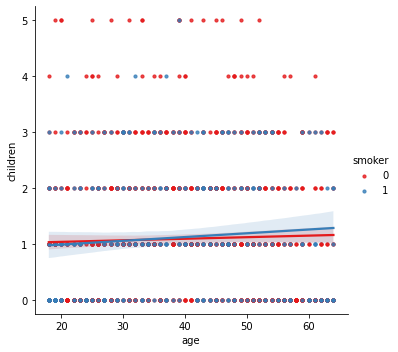

In [65]:
sns.lmplot( x='age',y='children', data=df, hue='smoker', palette='Set1', scatter_kws={"s": 10})
plt.show()

In [66]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_3164/3110748707.py, line 3)

In [ ]:
# most people who have one child smoke the most.

In [67]:
model = LinearRegression()
model.fit(train_X,train_y)

NameError: name 'train_X' is not defined

In [68]:
# Print Model intercept and co-efficent
print("Model intercept",model.intercept_,"Model co-efficent",model.coef_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [69]:
# People who smokes have higher medical expensen especially with bmi 30 and more

In [70]:
x = np.array(df[["age", "sex", "bmi", "smoker"]])
y = np.array(df["charges"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)

RandomForestRegressor()

In [72]:
ypred = forest.predict(xtest)
df = pd.DataFrame(data={"Predicted Premium Amount": ypred})
print(df.head())

   Predicted Premium Amount
0               9660.102579
1               3978.068941
2              10140.949541
3              40208.059506
4               8109.951281
